### Naive Bayes using Gaussian Quantile Transformer
This notebook implements Naive Bayes using a Gaussian Quantile Transformer from sklearn. 

This dataset is transformed using scaling functions from sklearn, specifically a Gaussian Quantile Transformer. This was a topic covered in machinelearningmastery.com and an offline ebook. I have covered Naive Bayes using Weka in my MSc course using a separate GUI application for Weka, so this lets me use it in Python with sklearn.

Refer to below sklearn documentation for impact of scalers for input features.
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

We import pandas, sklearn, train_test_split and the naive bayes GaussianNB library option.

Note: Naive Bayes assumes the features are independent and do not interact. We know from applied statistics this is unlikely to be the case in real world datasets, but Naive Bayes is known to perform well in any case.

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

#### Exploratory Data Analysis
We use the diabetes dataset. For information about this dataset, refer to the Kaggle dataset library summary:
- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

This will predicte whether a patient does or does not have diabetes. We have multiple predictor variables and one target variable - Outcome.

In [2]:
diabetes_df = pd.read_csv("../datasets/diabetes.csv")

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_df.shape

(768, 9)

In [7]:
diabetes_df.size

6912

In [8]:
diabetes_df.ndim

2

In [9]:
# The .T at the end displays the transpose i.e. we flip the columns to be the rows and rows become the columns
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
diabetes_df.sample(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
58,0,146,82,0,0,40.5,1.781,44,0
540,8,100,74,40,215,39.4,0.661,43,1
366,6,124,72,0,0,27.6,0.368,29,1
208,1,96,64,27,87,33.2,0.289,21,0
562,1,87,68,34,77,37.6,0.401,24,0


Verify if any null values in the dataframe for a given data column.

In [11]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
diabetes_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [13]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

The following calculates the pairwise correlation of columns. It does not include NA/null values.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [15]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Produce data visualization histogram plots for the pandas dataframe for the diabetes dataset and focus on the input feature distributions as we are going to scale the input data before training the model.

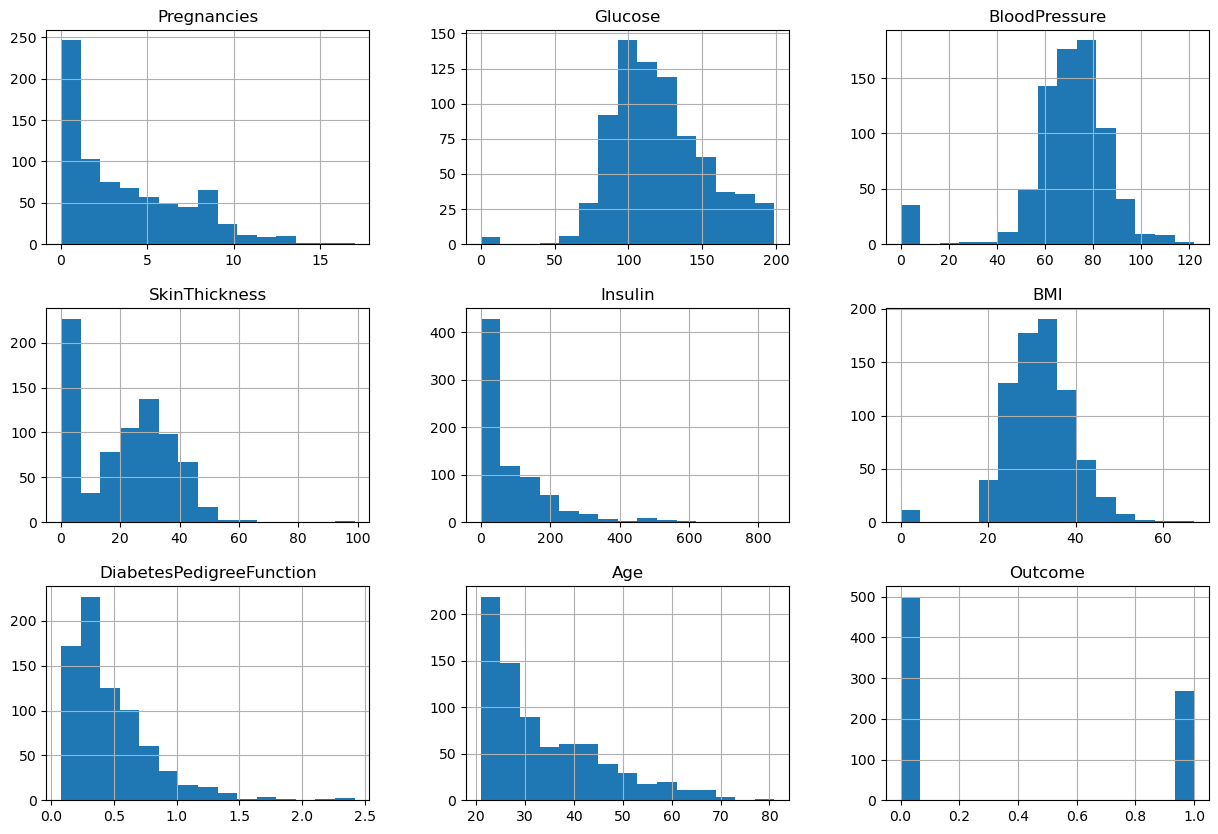

In [16]:
# Get histogram for each numeric variable - 9 variables so layout = 3x3
features_including_output_label = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_df[features_including_output_label].hist(bins=15, figsize=(15, 10), layout=(3, 3));

##### Transform the dataset input features
Transform the data input features. Import the QuantileTransformer. For more information, refer here:
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html

The goal of the Quantile Transformer is to transform the target dataset features and produce a normal distribution.

In [17]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', n_quantiles=10, random_state=0)

Target specific columns for scaling - omitting "Pregnancies", based on data type considerations on Kaggle samples.

In [18]:
# make a copy of the original dataframe
diabetes_df_scaled = diabetes_df
diabetes_df_scaled["Age"] = qt.fit_transform(diabetes_df[["Age"]])

In [19]:
diabetes_df_scaled["SkinThickness"] = qt.fit_transform(diabetes_df[["SkinThickness"]])

In [20]:
diabetes_df_scaled["Insulin"] = qt.fit_transform(diabetes_df[["Insulin"]])

In [21]:
diabetes_df_scaled["DiabetesPedigreeFunction"] = qt.fit_transform(diabetes_df[["DiabetesPedigreeFunction"]])

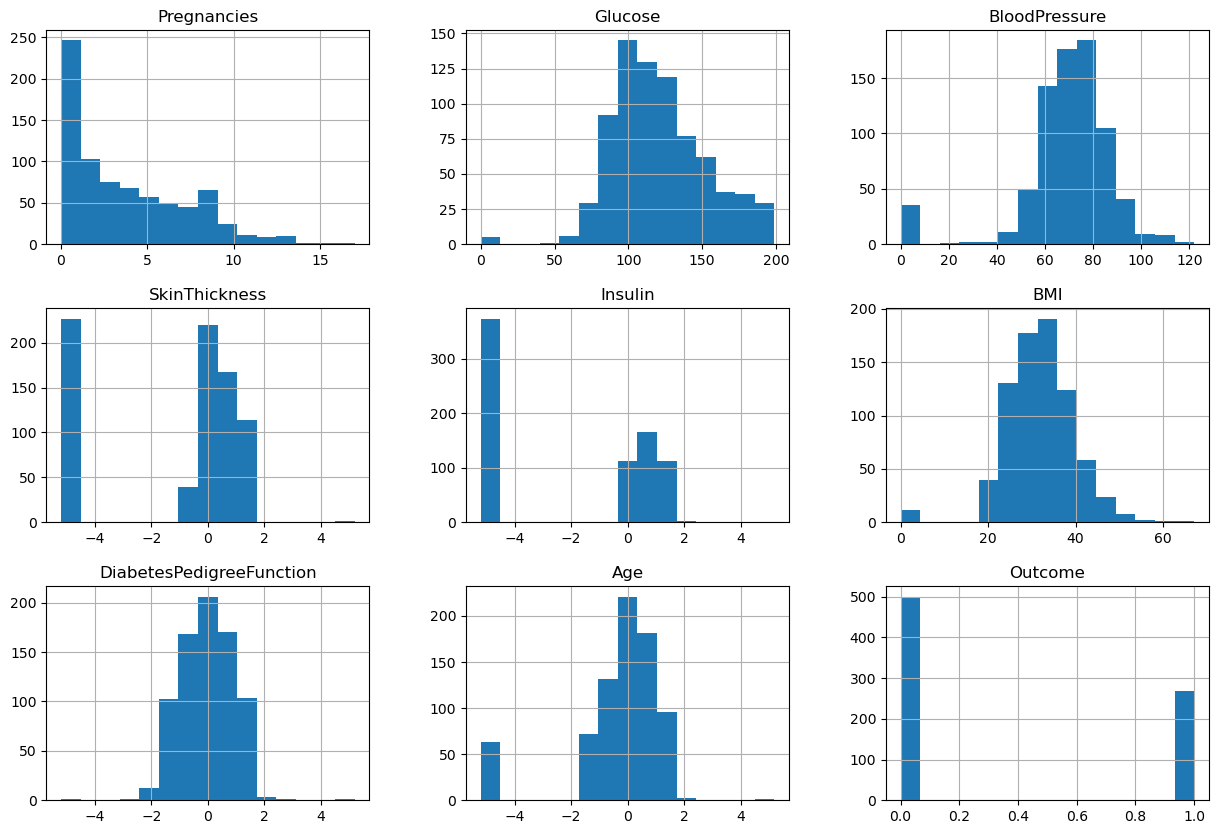

In [22]:
# Get histogram for each numeric variable - 9 variables so layout = 3x3
features_scaled = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_df_scaled[features_scaled].hist(bins=15, figsize=(15, 10), layout=(3, 3));

Compare above scaled output with the previous default graphs for the dataset. You can see the histograms for the target feature columns now follow a normal distribution where they did not in the original default dataset prior to the transformation step.

##### Create a train:test split on the dataset
Next, we define our train:test split using sklearn library. This lets us defined our supervised learning training set and a holdout test data subset. We will use a 33% portion of the dataset as a test set. We will use this to test the accuracy of the ML model on data it has not seen before in training and if it has overfit during training or can generalize to unseen data.

In [23]:
# split into features and categorical predictor variable (0 or 1)
X = diabetes_df_scaled.iloc[: , :8]
y = diabetes_df_scaled.iloc[: , -1]

# split into train and test sets with sklearn native train_test_split 33% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [24]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
214,9,112,82,0.645631,1.005170,34.2,-0.503833,0.430727
452,0,91,68,0.645631,1.229773,39.9,0.018036,-0.430727
4,0,137,40,0.876143,0.952703,43.1,2.351862,0.253347
292,2,128,78,0.999690,1.060562,43.3,1.374620,0.139710
609,1,111,62,-0.430727,1.060562,24.0,-1.465857,-0.764710
...,...,...,...,...,...,...,...,...
669,9,154,78,0.430727,0.468969,30.9,-1.268783,0.913250
607,1,92,62,0.133599,0.064700,19.5,0.303842,-0.430727
399,3,193,70,0.535083,-5.199338,34.9,-0.689997,-0.430727
471,0,137,70,1.067571,-5.199338,33.2,-1.229760,-1.220640


In [25]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
32,3,88,58,-0.478241,0.129673,24.8,-0.439733,-1.220640
305,2,120,76,0.999690,0.503290,39.7,-0.883532,-0.046436
8,2,197,70,1.271953,1.624678,30.5,-1.309841,1.279512
381,0,105,68,-0.030278,-5.199338,20.0,-0.742943,-1.220640
46,1,146,56,-5.199338,-5.199338,29.7,0.511795,-0.046436
...,...,...,...,...,...,...,...,...
409,1,172,68,1.315554,1.685733,42.4,0.849248,-0.139710
338,9,152,78,0.819154,0.974860,34.2,1.236992,0.253347
459,9,134,74,0.764710,0.169122,25.9,0.247401,5.199338
237,0,179,90,0.249427,-5.199338,44.1,0.815922,-0.764710


In [26]:
X_train.shape

(514, 8)

In [27]:
X_test.shape

(254, 8)

##### Machine Learning Model and Training
Now we create a GaussianNB machine learning model and fit it to our training dataset.

In [28]:
gnb_ml_clf = GaussianNB()

In [29]:
gnb_ml_clf.fit(X_train, y_train)

GaussianNB()

##### Gaussian Naive Bayes Model using Transformed Data: Run Predictions, Evaluate Performance
We now run the predictive analytics against the test dataset and calculate the accuracy of the ML model when predicting on new data, our test dataset.

In [30]:
y_pred = gnb_ml_clf.predict(X_test)

In [31]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 254 points : 62


In [32]:
gnb_ml_clf.score(X_test, y_test)

Include the sklearn classification report for precision, recall, f1-score, and support metrics.

In [33]:
metrics = classification_report(y_test, y_pred, output_dict=False)
print(metrics)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       163
           1       0.67      0.63      0.65        91

    accuracy                           0.76       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.75      0.76      0.75       254



In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[135,  28],
       [ 34,  57]])

Below is a useful sklearn confusion matrix display utility plot. I always refer to it ever I need to check the array dimensions for true label, predicted labels. Seaborn is used later for an alternative display plot with text labels.

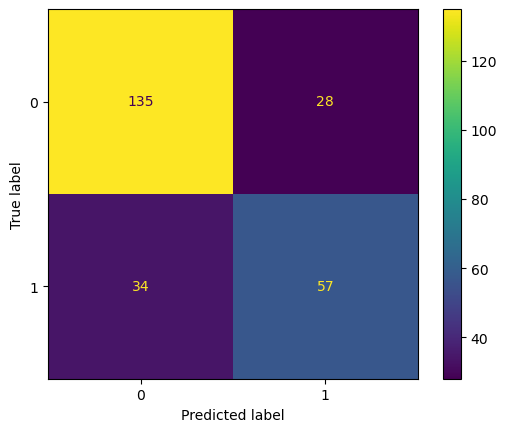

In [35]:
ConfusionMatrixDisplay(cm).plot()

<AxesSubplot:>

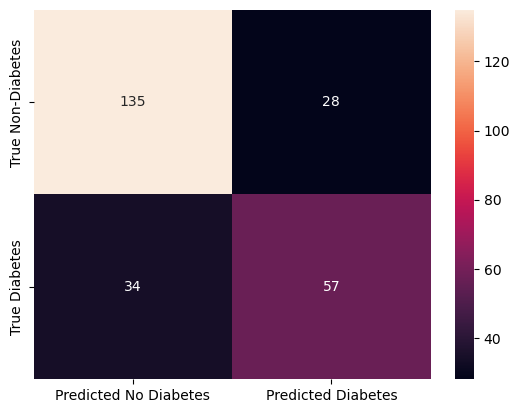

In [36]:
df_confusion_matrix = pd.DataFrame(cm, ['True Non-Diabetes', 'True Diabetes'],
                     ['Predicted No Diabetes', 'Predicted Diabetes'])

sns.heatmap(df_confusion_matrix, annot=True, fmt='g')

#### ROC Curve
Use sklearn library to plot the ROC curve for our two-class classification model predictions. The ROC curve is visualizing two parameters: True Positive rate, False Positive rate. And I use the documentation example from sklearn and just amend it to the variables here.

In [41]:
# Modify the prediction call to use the probabilities function for y_score variable
y_score = gnb_ml_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

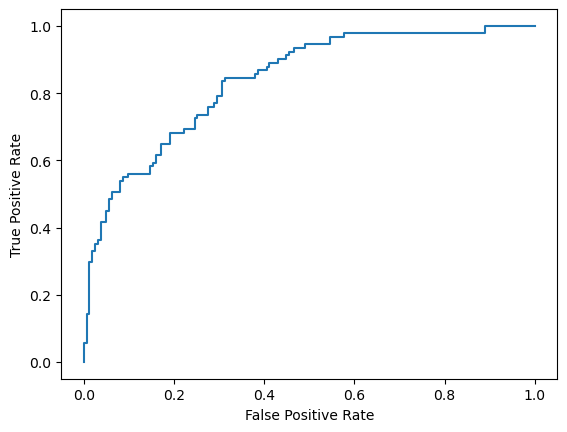

In [42]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

##### Gradio User Interface Layer
In this section, we add a user interface layer. While we can create synthetic data functions in Python code to test the ML model, it helps for a human stakeholder to be able to test out a machine learning model in a web browser, especially when evaluating a prototype. This was a really nice utility demonstrated on the [serverless-ml MLOps](https://github.com/niallguerin/serverless-ml-course/tree/main/src/01-module) course.

The below code re-uses the base code from serverless-ml GitHub course module 1 source code. However, this one is using a different dataset with more input values this time - diabetes and 8 input fields. I also modified the return output label and format to be a Text field not an Image result object so imports and code differs at those points below versus original template referenced.

I have also modified it to include an additional input function to transform the input values as users would not enter transformed data formats, so the function transforms the data inputs to map to the type of transformations we performed on the ML model during training and testing so it gets data in a format it was trained on; otherwise it has a mismatch. 

The model only has about 75% accuracy and from the confusion matrix, we can see it's better at predicting True Negatives. Two test cases are included and we can see it does not generally give Expected Result for True Positive for test case 2, which it should, but this is expected given our evaluation metrics for the model.

In [ ]:
# reuses template code from the serverless-ml course to scaffold the gradio UI
import gradio as gr
import numpy as np

def convert_label(label_num):
    if(label_num == 0):
        return "Outcome: This patient does not have Diabetes."
    if(label_num == 1):
        return "Outcome: This patient has Diabetes."

def transform_input_sample(input_lst):
    input_sample_df = pd.DataFrame(columns = X.columns)    
    input_sample_df.loc[0] = input_lst
    
    # apply the quantile transformer to the input sample before calling the predictive analytics service
    input_sample_df["SkinThickness"] = qt.fit_transform(input_sample_df[["SkinThickness"]])
    input_sample_df["Insulin"] = qt.fit_transform(input_sample_df[["Insulin"]])
    input_sample_df["DiabetesPedigreeFunction"] = qt.fit_transform(input_sample_df[["DiabetesPedigreeFunction"]])
    input_sample_df["Age"] = qt.fit_transform(input_sample_df[["Age"]])

    return input_sample_df
    
def diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    input_list = []
    input_list.append(Pregnancies)
    input_list.append(Glucose)
    input_list.append(BloodPressure)
    input_list.append(SkinThickness)
    input_list.append(Insulin)
    input_list.append(BMI)
    input_list.append(DiabetesPedigreeFunction)
    input_list.append(Age)
    
    transformed_input_sample = transform_input_sample(input_list)    
    result = gnb_ml_clf.predict(transformed_input_sample)
    patient_status = convert_label(result)
    
    return patient_status

demo = gr.Interface(
    fn=diabetes,
    title="Diabetes Patient Predictive Analytics",
    description="Experiment with inputs to predict whether the patient has diabetes. Test Case 1: Expected Result: No Diabetes - [1,85,66,29,0,26.6,0.351,31], Test Case 2: Expected Result: Has Diabetes [6,148,72,35,0,33.6,0.627,50]",
    allow_flagging="never",
    inputs=[
        gr.inputs.Number(default=1, label="Pregnancies"),
        gr.inputs.Number(default=85, label="Glucose"),
        gr.inputs.Number(default=66, label="BloodPressure"),
        gr.inputs.Number(default=29, label="SkinThickness"),
        gr.inputs.Number(default=0, label="Insulin"),
        gr.inputs.Number(default=26.6, label="BMI"),
        gr.inputs.Number(default=0.351, label="DiabetesPedigreeFunction"),
        gr.inputs.Number(default=31, label="Age"),
        ],
    outputs=gr.Textbox(label="Outcome"))

demo.launch(share=False)

#### Web References
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
- https://gradio.app/docs/